##  **Data Analysis for Retinal Images IQA Project**
### **Instituto de Matemática e Estatística da Universidade de São Paulo (IME-USP)**
### Rodrigo de Castro Michelassi
### 29.01.24

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('labels.csv', sep=',')
data.head(15)

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
5,img00006,3,Canon CR,22.0,diabetes1,11,yes,1,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
6,img00007,4,Canon CR,22.0,diabetes1,1,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
7,img00008,4,Canon CR,22.0,diabetes1,1,yes,1,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
8,img00009,5,Canon CR,23.0,diabetes1,20,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
9,img00010,5,Canon CR,23.0,diabetes1,20,yes,1,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate


### Notice that out of the $15$ first images on the dataset, all of them have "adequate" quality
### With that said, we may have a problem on creating a classifier for image quality using those data
### Let us explore the data a little bit more!

In [3]:
data.shape
total = data.shape[0]

In [4]:
qtd_inadequate = 0
for item in data["quality"]:
    if item == "Inadequate":
        qtd_inadequate += 1
print(f"The dataset contains {total} images")
print(f"Out of those, {qtd_inadequate} are inadequate")
print(f"In general, only {(100 * 1987 / 16266):.2f}% of the images are inadequate")

The dataset contains 16266 images
Out of those, 1987 are inadequate
In general, only 12.22% of the images are inadequate


### Now, let us look into why are those images inadequate

> **Focus:** the image is unfocused, on many different regions (corners, edges, all of it, etc)

> **Ilumination:** the image is darker than it should

> **Image Field:** the image does not cover all of the eye region necessary for algorithmic evaluations

> **Artifacts:** the image presents elements on top of important regions (dust, points, etc)

In [14]:
important_columns = ['image_id', 'patient_id', 'focus', 'iluminaton', 'image_field', 'artifacts', 'quality']
data[important_columns].iloc[6800:6850]

,image_id,patient_id,focus,iluminaton,image_field,artifacts,quality
6800,img06801,3578,1,1,1,1,Adequate
6801,img06802,3579,1,1,2,1,Inadequate
6802,img06803,3579,1,1,1,1,Adequate
6803,img06804,3580,1,1,1,1,Adequate
6804,img06805,3580,1,1,2,1,Inadequate
6805,img06806,3581,1,1,2,1,Inadequate
6806,img06807,3581,1,1,2,1,Inadequate
6807,img06808,3582,1,1,2,1,Inadequate
6808,img06809,3582,1,1,2,1,Inadequate
6809,img06810,3583,1,1,1,1,Adequate


### Most of the inadequate images are closely distributed on the dataset (shuffle to train)
### All the inadequate images have $2$ in some of the important columns
### Image $6815$ is inadequate due to focus and image_field problems
### With this analysis, let us count how many images present each problem

In [6]:
qtd_focus = 0
qtd_ilumination = 0
qtd_field = 0
qtd_artifact = 0

for i in range(data.shape[0]):
    if data['quality'][i] == 'Inadequate':
        if data['focus'][i] == 2:
            qtd_focus += 1
        if data['iluminaton'][i] == 2:
            qtd_ilumination += 1
        if data['image_field'][i] == 2:
            qtd_field += 1
        if data['artifacts'][i] == 2:
            qtd_artifact += 1

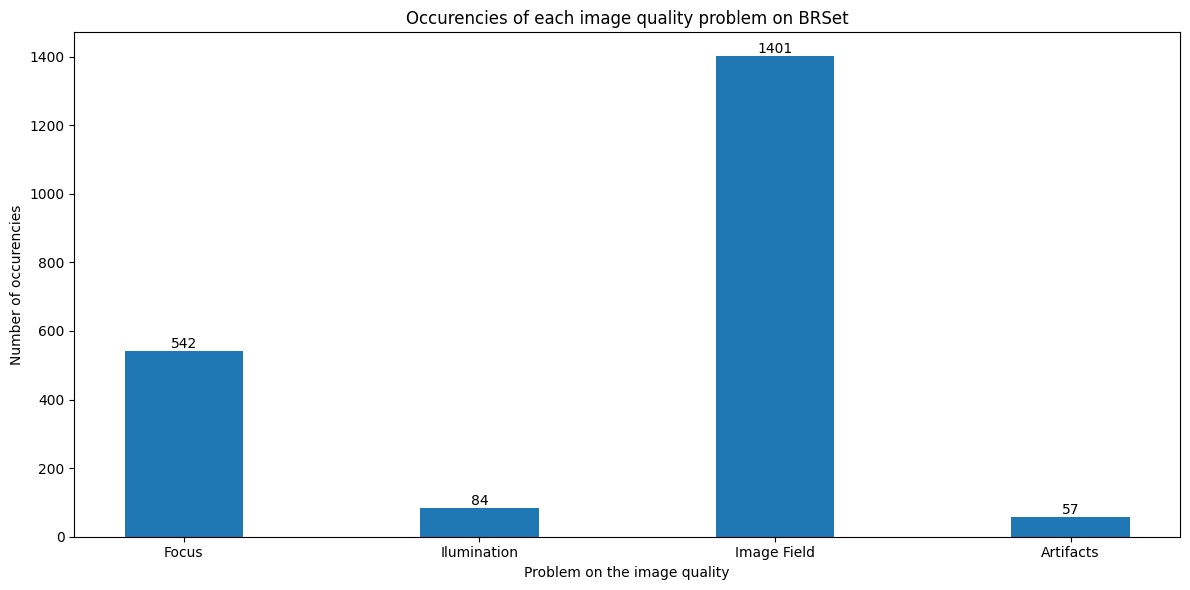

In [7]:
data_amounts = []

data_amounts.append(qtd_focus)
data_amounts.append(qtd_ilumination)
data_amounts.append(qtd_field)
data_amounts.append(qtd_artifact)

labels = ['Focus', 'Ilumination', 'Image Field', 'Artifacts']

# plt.grid()
plt.figure(figsize=(12,6))
plt.bar(labels, data_amounts, width=0.4)
plt.xlabel("Problem on the image quality")
plt.ylabel("Number of occurencies")
plt.title("Occurencies of each image quality problem on BRSet")
for i, val in enumerate(data_amounts):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### It might be necessary to augment poor artifacts and poor ilumination data
### There are more total occurencies than total inadequate because some images have more than 1 problem

### Let's analyse how many images are crossing problems

In [8]:
# Two problems
qtd_focus_ilumination = 0
qtd_focus_field = 0
qtd_focus_artifact = 0

qtd_ilumination_field = 0
qtd_ilumination_artifact = 0

qtd_field_artifact = 0

# Three problems
qtd_focus_ilumination_field = 0
qtd_focus_ilumination_artifact = 0
qtd_focus_field_artifact = 0
qtd_ilumination_field_artifact = 0

# Calculating
for i in range(data.shape[0]):
    if data['quality'][i] == 'Inadequate':
        # focus
        if data['focus'][i] == 2 and data['iluminaton'][i] == 2:
            qtd_focus_ilumination += 1
            if data['image_field'][i] == 2:
                qtd_focus_ilumination_field += 1
            if data['artifacts'][i] == 2:
                qtd_focus_artifact += 1

        if data['focus'][i] == 2 and data['image_field'][i] == 2:
            qtd_focus_field += 1
            if data['artifacts'][i] == 2:
                qtd_focus_field_artifact += 1

        if data['focus'][i] == 2 and data['artifacts'][i] == 2:
            qtd_focus_artifact += 1
        
        # ilumination
        if data['iluminaton'][i] == 2 and data['image_field'][i] == 2:
            qtd_ilumination_field += 1
            if data['artifacts'][i] == 2:
                qtd_ilumination_field_artifact += 1

        if data['iluminaton'][i] == 2 and data['artifacts'][i] == 2:
            qtd_ilumination_artifact += 1
        
        # image field
        if data['image_field'][i] == 2 and data['artifacts'][i] == 2:
            qtd_ilumination_artifact += 1

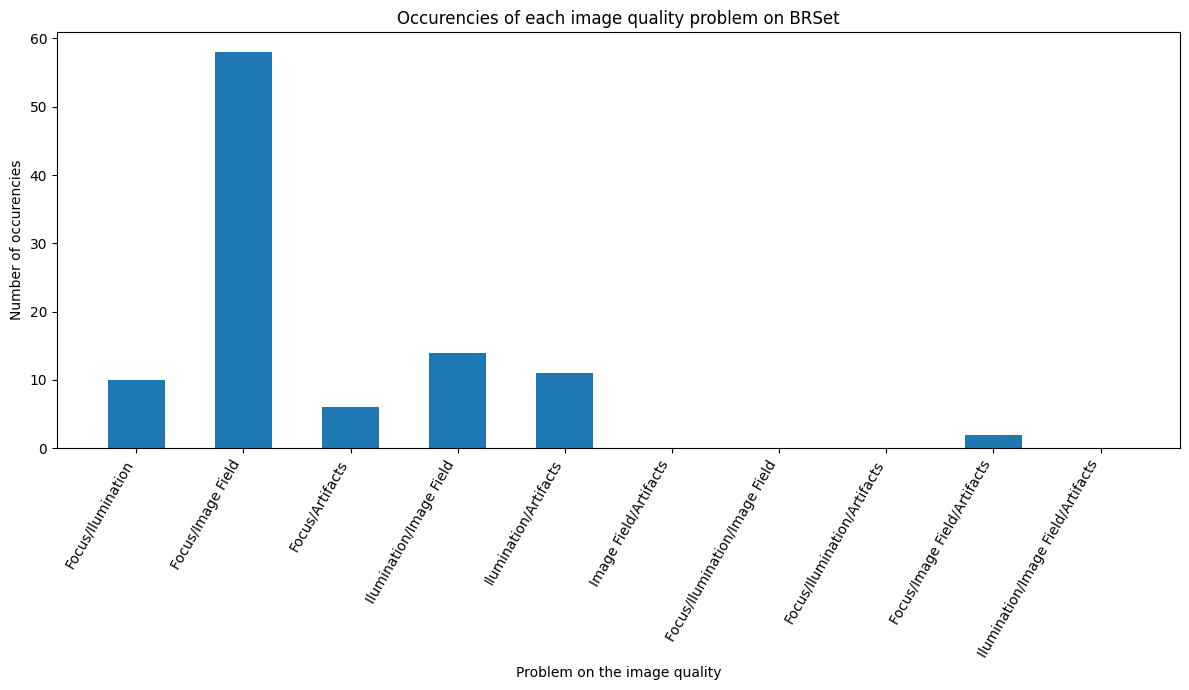

In [9]:
labels_multiple = ['Focus/Ilumination', 'Focus/Image Field', 'Focus/Artifacts', 'Ilumination/Image Field', 'Ilumination/Artifacts', 'Image Field/Artifacts', 'Focus/Ilumination/Image Field', 'Focus/Ilumination/Artifacts', 'Focus/Image Field/Artifacts', 'Ilumination/Image Field/Artifacts']

data_amounts_multiple = []
data_amounts_multiple.append(qtd_focus_ilumination)
data_amounts_multiple.append(qtd_focus_field)
data_amounts_multiple.append(qtd_focus_artifact)
data_amounts_multiple.append(qtd_ilumination_field)
data_amounts_multiple.append(qtd_ilumination_artifact)
data_amounts_multiple.append(qtd_field_artifact)
data_amounts_multiple.append(qtd_focus_ilumination_field)
data_amounts_multiple.append(qtd_focus_ilumination_artifact)
data_amounts_multiple.append(qtd_focus_field_artifact)
data_amounts_multiple.append(qtd_ilumination_field_artifact)

plt.figure(figsize=(12,7))
plt.bar(labels_multiple, data_amounts_multiple, width=0.53)
plt.xlabel("Problem on the image quality")
plt.ylabel("Number of occurencies")
plt.title("Occurencies of each image quality problem on BRSet")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### Printing images that has *artifacts* problem

In [10]:
for i in range(data.shape[0]):
    if data['quality'][i] == 'Inadequate':
        if data['artifacts'][i] == 2:
            print(data['image_id'][i])

img00932
img01068
img01304
img01527
img03408
img03417
img03434
img03453
img03459
img03528
img03635
img03966
img04133
img04338
img04422
img04460
img04461
img04490
img04545
img04583
img04737
img04738
img04959
img05045
img05188
img05230
img05303
img05716
img05839
img05869
img05953
img05954
img05970
img06014
img06265
img06775
img06853
img07149
img07150
img07278
img07353
img07390
img07654
img07658
img07797
img08359
img08421
img08556
img08978
img10211
img10238
img10330
img11979
img12723
img13046
img13685
img16235


### Some patients took both eyes pictures
### Let us count how many did not

The dataset contains 16266 images
There are 804 patients with only one eye picture
There are 7706 patients with two eyes pictures
There are 14 patients with more than two eyes pictures


/var/folders/ty/w484s12s44x17p2vph_lydvm0000gn/T/ipykernel_81613/1879181392.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  for i in range(int(data['patient_id'].tail(1))):


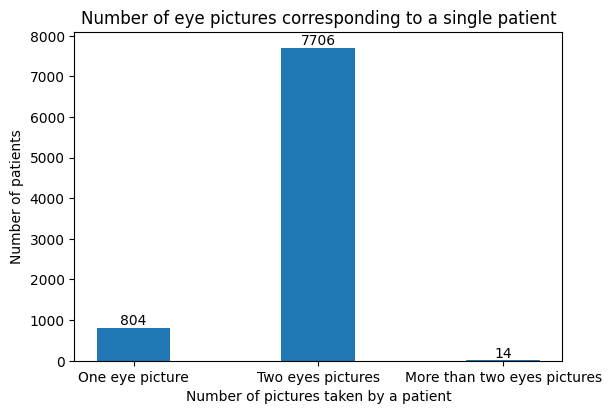

In [11]:
qtd_images_patient = [0]
cont = 0

# initializing vector
for i in range(int(data['patient_id'].tail(1))):
    cont += 1
    qtd_images_patient.append(0)

# counting how many patients there are on each id
qtd_ones = 0
qtd_twos = 0
qtd_other = 0
for i in range(data.shape[0]):
    qtd_images_patient[data['patient_id'][i]] += 1

for index in qtd_images_patient:
    if index == 1:
        qtd_ones += 1
    if index == 2:
        qtd_twos += 1
    if index > 2:
        qtd_other += 1

print(f"The dataset contains {total} images")
print(f"There are {qtd_ones} patients with only one eye picture")
print(f"There are {qtd_twos} patients with two eyes pictures")
print(f"There are {qtd_other} patients with more than two eyes pictures")

# plotting the data obtained
patient_occurencies = [qtd_ones, qtd_twos, qtd_other]
patient_occurencies_labels = ["One eye picture", "Two eyes pictures", "More than two eyes pictures"]

plt.figure(figsize=(6, 4))
bars = plt.bar(patient_occurencies_labels, patient_occurencies, width=0.4)
for bar, count in zip(bars, patient_occurencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')
plt.xlabel("Number of pictures taken by a patient")
plt.ylabel("Number of patients")
plt.title("Number of eye pictures corresponding to a single patient")
plt.tight_layout(pad=0.2)
plt.show()